# Week 3 Summary
> NAME: $\color{red}{\text{    Phu Dang     }}$
> 
> PID: $\color{red}{\text{    A16913100     }}$
>
> 
---

I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

## Key Takeaways from Week 3


#### Monday: 

Review of different sampling distributions, one/two sample proportions/means, and confidence intervals

- Looked into how the Binomial rv is essentially an aggregation of Bernoullis
- Similarly, how the Gamma distribution is essentially the sum of n exponential rvs if the number of event occurrence is n
- Examined the meaning behind confidence intervals and how they represent the capture rate of the true parameter over different confidence intervals generated from different experiments


#### Wednesday

Review of 1 sample proportion confidence intervals and covered confidence intervals for difference of two proportions. Notably, the standard error is comprised of the sum of the individual variances, which resembles the overall variance of the difference. Including how to interpret a confidence interval in the case of only 1 experiment sample; essentially, can not conclude capture rate, however, the CI still provides insights into the skewedness. or not, of the sampling distribution with x% confidence. 

- Confidence intervals for difference of two proportions
- Interpretation of confidence intervals in the case of two sample proportions


#### Friday: 

Review of topics from monday and wednesday. Covered confidence intervals for one sample mean and difference of two sample means. Compared manually calculated results with those from the Statsmodels api. Contrasted the Student's t distribution and the standard normal distribution and how one may be more accurate over the other depending on our knowing of $\sigma^2$, this is examined by comparing the distribution's coverage with the initial desired confidence level.

- Confidence intervals for one sample means
- Confidence intervals for difference of two sample means
- Student's t distribution vs. standard normal
    - Which to use depending on the information available

---

%%latex
\newpage

## Monday, Jan 22nd

Monday was a review of sampling distributions, especially the idea of repeating an experiment multiple times, which results in different distribution parameters depending on the empirical data observations.

Key concepts covered:

- One sample proportion
- Two sample proportions
- One sample mean
- Two sample means
- Confidence intervals


#### More notes

- Student's t distribution with n-1 degrees of freedom is followed by:
    - Resembles the normal distribution 

$$ \frac{\hat\mu - \mu}{\sqrt{\hat\sigma^2 / n}} \text{ ~ t(n-1)} $$

    
- The Gamma distribution reduces to the exponential distribution, they are exactly the same when the number of event occurrence equals 1

$$ \hat \lambda \text{ ~ } \frac{1}{n} \times \Gamma(n, n \times \lambda) $$

- Confidence interval fundamentals
    - Area of confidence is 1- $\alpha$
    

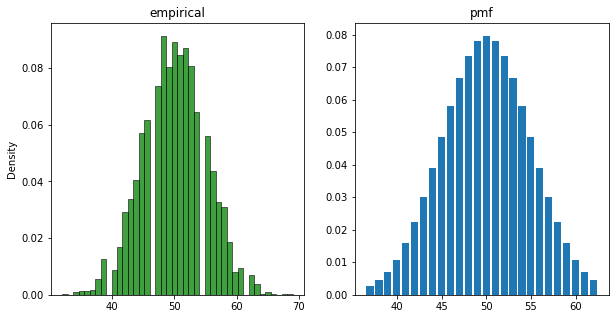

In [24]:
# Quick illustration of the Central Limit Theorem

p = 0.5
n, N = 100, 2500
thetaHats = [stats.bernoulli(p).rvs(n).sum() for _ in range(N)]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("empirical")
sns.histplot(thetaHats, ax=ax[0], stat='density', color='green');

minX, maxX = stats.binom(n, p).ppf((0.01, 1-0.01))
suppX = np.arange(minX-1, maxX+1)
ax[1].bar(suppX, stats.binom(n, p).pmf(suppX))
ax[1].set_title('pmf');

#### Two sample proportions example

$$ \hat \mu \text{ ~ N(} \mu,\sigma^2/n \text{)}  $$

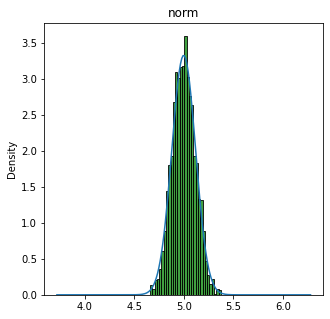

In [26]:
# Two sample proportions

mu = 5
sigma = 1.2
n, N = 100, 2500
thetaHats = [stats.norm(mu, sigma).rvs(n).mean() for _ in range(N)]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.histplot(thetaHats, ax=ax, stat='density', color='green');
minX, maxX = stats.norm(mu, sigma/np.sqrt(n)).ppf((0.01, 1-0.01))
suppX = np.linspace(minX-1, maxX+1, 200)
ax.plot(suppX, stats.norm(mu, sigma/np.sqrt(n)).pdf(suppX))
ax.set_title('norm');

#### Confidence Intervals

In [67]:
# Simulate binary survey data (bernoulli)

thetaTrue = 0.75

def survey(n):
    return stats.bernoulli.rvs(thetaTrue, size=n)

In [68]:
responses = survey(100)
responses

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [30]:
thetaHat = np.mean(responses)
thetaHat

0.78

In [55]:
# Illustrate the capture of confidence interval (95%)

N = 2000
n = 100
capture = []

for _ in range(N):
    responses = survey(n)
    thetaHat = np.mean(responses)
    LB = thetaHat - 1.96*np.sqrt(thetaHat*(1-thetaHat)/n)
    UB = thetaHat + 1.96*np.sqrt(thetaHat*(1-thetaHat)/n)
    capture.append(thetaTrue > LB and thetaTrue < UB)

print(f"Capture rate: {np.mean(capture)}")
print(f"Confidence: {np.round(np.mean(capture)*100, 1)}%")

Capture rate: 0.9515
Confidence: 95.2%


---

%%latex 
\newpage

## Wed, Jan 24th

Wednesday was a review of confidence intervals for one sample proportion, including graphical demonstration of how the confidence "width" changes as alpha changes, where $ \alpha $ represents the two-tail area of the standard normal distribution. Then, followed by confidence intervals for difference of two proportions with demo using class survey data. 

An interpretation of the confidence interval was explained to show with x% confidence that there is, or not, a skewedness in the distribution (e.g. enrollment by gender in class --> can claim skewedness if 50% is not in the interval with x% confidence).

Key concepts covered:

- Confidence interval for 1 sample proportion
- Confidence interval for 2 sample proportions
- Confidence interval for difference of two proportions

#### Extra notes

- For 1 sample prop confidence intervals, the standard error (SE) is:
  
$$ \sqrt\frac{\hat\theta(1-\hat\theta)}{n} $$

- "A probabilistic statement only hold for something that is random" - SV
- "Probabilities refer to random processes" - DQ
- For confidence intervals of difference of two proportions:
    - Parameter of interest is: $ \theta_X - \theta_Y $
    - Statistic of interest is: $ \hat\theta_X - \hat\theta_Y $ 
    - Standard error (SE) is:
    
    $$ SE = \sqrt{\frac{\hat\theta_X(1-\hat\theta_X)}{n} + \frac{\hat\theta_Y(1-\hat\theta_Y)}{m}} $$
    
    - Logic: The variance of a difference is the sum of the individual variances


- Definition of a standard $\alpha$-quantile: the area under the standard normal distribution to the left of the x value, $ q_{\alpha} $, where the area is $\alpha$ 

    - Or:

    $$
    P(X \le q_{\alpha}) = \alpha
    $$

#### Demo of CI for difference of 2 proportions and show capture rate

In [60]:
# Simulate two surveys

thetaX = 0.8
thetaY = 0.6
diffTrue = thetaX - thetaY

def twoSurveys(n, m):
    return ({
        "x": stats.bernoulli.rvs(thetaX, size=n),
        "y": stats.bernoulli.rvs(thetaY, size=m)
    })

In [58]:
results = twoSurveys(50, 50)

In [59]:
results

{'x': array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]),
 'y': array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1])}

In [65]:
# Illustrate the capture of confidence interval (90%)

N = 2000
n, m = 50, 50
capture = []

for _ in range(N):
    responses = twoSurveys(n, m)
    thetaHatX = np.mean(responses['x'])
    thetaHatY = np.mean(responses['y'])
    diffHat = thetaHatX - thetaHatY
    LB = diffHat - 1.64*np.sqrt(thetaHatX*(1-thetaHatX)/n + thetaHatY*(1-thetaHatY)/n)
    UB = diffHat + 1.64*np.sqrt(thetaHatX*(1-thetaHatX)/n + thetaHatY*(1-thetaHatY)/n)
    capture.append(diffTrue > LB and diffTrue < UB)

print(f"Capture rate: {np.mean(capture)}")
print(f"Confidence: {np.round(np.mean(capture)*100, 1)}%")

Capture rate: 0.9065
Confidence: 90.6%


---

%%latex 
\newpage

## Fri, Jan 12th

Friday started with a quick review of topics from monday and wednesday. Covered what the annotation $ \alpha $-quantile represents graphically (left tail), contrary to $ z_\alpha $ that corresponds to the right tail. Reviewed CIs for 1 sample proportion and 2 sample proportions. Then moved towards confidence intervals for one sample mean, and compared the differences in coverage between the Student's t and z standard normal distributions.

Key concepts covered:

- How to interpret statistical observations, confidence intervals, numeric quantities, etc.
- Confirm confidence intervals using statsmodels api
- Confidence intervals for one sample mean

When $\sigma^2$ is known:
    
$$
CI(\mu, \alpha) = \biggr[\hat\mu - z_{\alpha/2} \cdot SE, \hat\mu + z_{\alpha/2} \cdot SE \biggr]
$$

$$
SE = \frac{\sigma}{\sqrt{n}}
$$

When $\sigma^2$ is NOT known:

$$
CI(\mu, \alpha) = \biggr[\hat\mu - t_{n-1; \alpha/2} \cdot SE, \hat\mu + t_{n-1; \alpha/2} \cdot SE \biggr]
$$

$$
SE = \frac{\hat\sigma}{\sqrt{n}}
$$

Note: $t_{n-1; \alpha/2}$ is the $\alpha/2$ upper quantile of the $t-$distribution with $n-1$ degrees of freedom

- Confidence intervals for difference of two means

$$
CI(\mu_X - \mu_Y, \alpha) = \biggr[(\hat\mu_X-\hat\mu_Y) - t_{n+m-2;\alpha/2} \cdot SE, (\hat\mu_X-\hat\mu_Y) + t_{n+m-2;\alpha/2} \cdot SE \biggr]
$$

$$
SE = \sqrt{\frac{{\hat\sigma^2}_X}{n} + \frac{{\hat\sigma^2}_Y}{m}}
$$

$$
\text{Sample variance of X:} \;\;\;\; {\hat\sigma^2}_X = \frac{1}{n-1} \sum_{i=1}^{n} (X_i-\overline X)^2 
$$

$$
\text{Sample variance of Y:} \;\;\;\; {\hat\sigma^2}_Y = \frac{1}{m-1} \sum_{i=1}^{m} (Y_i-\overline Y)^2 
$$

- Student's t vs z standard normal
    - When $\sigma^2$ is not known, the sampling distribution follows the t distribution with n-1 dof. When $\sigma^2$ is known, the sampling distribution follows a standard normal distribution.

#### Using scipy.stats functions to generate confidence intervals

In [69]:
x = survey(100)

In [76]:
# Statsmodels api

result = sm.stats.proportion_confint(np.sum(x), len(x), alpha=0.05)
print(f'Statsmodels api: {result}')

Statsmodels api: (0.6540292679395162, 0.8259707320604838)


#### Repeat for 2 sample proportions confidence intervals

In [78]:
data = twoSurveys(n, m)

In [88]:
# Statsmodels api

result = sm.stats.confint_proportions_2indep(
    np.sum(data['x']),
    len(data['x']),
    np.sum(data['y']),
    len(data['y']),
    alpha=0.05,
    method='wald'
)

print(f'Statsmodels api: {result}')

Statsmodels api: (0.057818211089040894, 0.4221817889109591)


In [91]:
# Manual

thetaHatX = np.mean(data['x'])
thetaHatY = np.mean(data['y'])
diffHat = thetaHatX - thetaHatY
LB = diffHat - 1.96*np.sqrt(thetaHatX*(1-thetaHatX)/n + thetaHatY*(1-thetaHatY)/n)
UB = diffHat + 1.96*np.sqrt(thetaHatX*(1-thetaHatX)/n + thetaHatY*(1-thetaHatY)/n)

print(f"Our calc: {(LB, UB)}")
print(f'Statsmodels api: {result}')

Our calc: (0.057814863394403115, 0.42218513660559687)
Statsmodels api: (0.057818211089040894, 0.4221817889109591)


#### Demo confidence interval for 1 sample mean

In [95]:
# Generate sleep surveys

muTrue = 8

def meanSurvey(n):
    return stats.norm.rvs(muTrue, 2.8, size=n)

meanSurvey(20)

array([ 3.19520328,  4.90269117,  8.0974771 , 11.44438122,  8.16833906,
       13.35993661,  7.19693308, 11.54944179,  6.39099356,  9.91520471,
        4.17504948,  1.86250549,  7.01931147,  9.24601135, 12.11431207,
        8.34872387, 10.91746602, 11.38856178, 11.29358629,  8.53579966])

In [103]:
# Illustrate capture rate over repeated survyes

N = 1000
n = 50
alpha = 0.05
capture = []

for _ in range(N):
    result = meanSurvey(n)
    muHat = np.mean(result)
    se = np.std(result, ddof=1) / np.sqrt(n)
    ci = np.array((-1, +1)) * stats.t(n-1).ppf(1-alpha/2) * se + muHat
    capture.append(muTrue > ci[0] and muTrue < ci[1])

print(np.mean(capture))

0.95


#### Extra notes

In [105]:
# How to get z-sub-alpha/2 from desired confidence level
# confidence % = (1-alpha)*100

# for 95& confidence
alpha = 0.05
stats.norm(0, 1).ppf(1-alpha/2)

1.959963984540054